In [6]:
import pandas as pd
df = pd.read_csv("wts.txt", sep="\t", header=None,names=['labels','text'])
df

,labels,text
0,student,brian comput scienc depart univers wisconsin d...
1,student,denni swanson web page mail pop uki offic hour...
2,faculty,russel impagliazzo depart comput scienc engin ...
3,student,dave phd student depart comput scienc univers ...
4,project,center lifelong learn design univers colorado ...
...,...,...
2798,project,faster harder kill laboratori experiment softw...
2799,faculty,previou content steven faculti research guid p...
2800,student,sandeep graduat student studi comput scienc cl...
2801,course,web oper system uniqu mwf tai recent explos in...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  2803 non-null   object
 1   text    2785 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


<AxesSubplot:xlabel='labels', ylabel='count'>

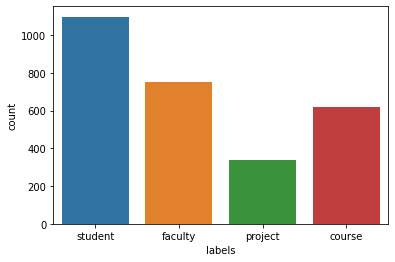

In [3]:
import seaborn as sns
sns.countplot(data = df, x = 'labels')

In [4]:
df['labels'] = df.labels.map({'student':0, 'faculty':1, 'project':2, 'course':3})

In [5]:
df

,labels,text
0,0,brian comput scienc depart univers wisconsin d...
1,0,denni swanson web page mail pop uki offic hour...
2,1,russel impagliazzo depart comput scienc engin ...
3,0,dave phd student depart comput scienc univers ...
4,2,center lifelong learn design univers colorado ...
...,...,...
2798,2,faster harder kill laboratori experiment softw...
2799,1,previou content steven faculti research guid p...
2800,0,sandeep graduat student studi comput scienc cl...
2801,3,web oper system uniqu mwf tai recent explos in...


In [6]:
for i in range(df.shape[0]):
    df['text'][i]=str(df['text'][i])
len(df['text'][0])

C:\Users\nikhil\AppData\Local\Temp\ipykernel_20944\4258760297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i]=str(df['text'][i])


1738

# TOKENS

In [7]:
import spacy
spacy_nlp = spacy.blank('en')
type(df['text'][0])
for i in range(df.shape[0]):
        doc = spacy_nlp(df['text'][i])
        tokens = [token.text for token in doc]
        df['text'][i]=tokens
df.head()

C:\Users\nikhil\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
C:\Users\nikhil\AppData\Local\Temp\ipykernel_20944\3414158214.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i]=tokens


,labels,text
0,0,"[brian, comput, scienc, depart, univers, wisco..."
1,0,"[denni, swanson, web, page, mail, pop, uki, of..."
2,1,"[russel, impagliazzo, depart, comput, scienc, ..."
3,0,"[dave, phd, student, depart, comput, scienc, u..."
4,2,"[center, lifelong, learn, design, univers, col..."


# pos

In [8]:
# for i in range(df.shape[0]):
#     for j in range(len(df['text'][i])):
#         print(df['text'][i][j])

# lemm

In [9]:
import nltk 
print('NLTK Version: %s' % (nltk.__version__))

nltk.download('wordnet')

wordnet_lemmatizer = nltk.stem.WordNetLemmatizer()

NLTK Version: 3.7


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
for i in range(df.shape[0]):
    for token in df['text'][i]:
        lemmatized_token = wordnet_lemmatizer.lemmatize(token) 
        if token != lemmatized_token:
            print('Original : %s, New: %s' % (token, lemmatized_token))

Original : automata, New: automaton
Original : perus, New: peru
Original : criteria, New: criterion
Original : criteria, New: criterion
Original : criteria, New: criterion
Original : pars, New: par
Original : umass, New: uma
Original : automata, New: automaton
Original : automata, New: automaton
Original : buss, New: bus
Original : symposia, New: symposium
Original : sens, New: sen
Original : sens, New: sen
Original : sens, New: sen
Original : discuss, New: discus
Original : discuss, New: discus
Original : discuss, New: discus
Original : corpora, New: corpus
Original : corpora, New: corpus
Original : sens, New: sen
Original : corpora, New: corpus
Original : sens, New: sen
Original : sens, New: sen
Original : corpora, New: corpus
Original : sens, New: sen
Original : sens, New: sen
Original : sens, New: sen
Original : sens, New: sen
Original : alumni, New: alumnus
Original : discuss, New: discus
Original : media, New: medium
Original : discuss, New: discus
Original : focuss, New: focus
O

In [11]:
len(df['text'][0])

252

# STEMM

In [12]:
porter_stemmer = nltk.stem.PorterStemmer()

In [13]:
for i in range(df.shape[0]):
    for token in df['text'][i]:
        stemmed_token = porter_stemmer.stem(token)
        if token != stemmed_token:
            print('Original : %s, New: %s' % (token, stemmed_token))

Original : univers, New: univ
Original : profession, New: profess
Original : milwauke, New: milwauk
Original : atmospher, New: atmosph
Original : atmospher, New: atmosph
Original : univers, New: univ
Original : univers, New: univ
Original : cours, New: cour
Original : univers, New: univ
Original : decis, New: deci
Original : character, New: charact
Original : decis, New: deci
Original : decis, New: deci
Original : decis, New: deci
Original : univers, New: univ
Original : univers, New: univ
Original : univers, New: univ
Original : univers, New: univ
Original : univers, New: univ
Original : cours, New: cour
Original : univers, New: univ
Original : univers, New: univ
Original : perus, New: peru
Original : univers, New: univ
Original : univers, New: univ
Original : univers, New: univ
Original : represent, New: repres
Original : univers, New: univ
Original : databas, New: databa
Original : univers, New: univ
Original : cours, New: cour
Original : univers, New: univ
Original : claus, New: cl

In [14]:
len(df['text'][0])

252

# stop words

import nltk 
nltk.download('stopwords')

In [16]:
nltk_stopwords = nltk.corpus.stopwords.words('english')

In [17]:
for i in range(df.shape[0]):
    tokens=df['text'][i]
    tokens = [token for token in tokens if not token in nltk_stopwords]

In [18]:
len(df['text'][0])

252

# features matrix